# HW 1: Classification and Evaluation metrics
#### COSC 410: Spring 2024, Colgate University

In this assignment, you will be working with the Iris dataset to classify three Iris species: Setosa, Versicolor and Virginica. Since this is a very small dataset, instead of creating separate splits for train and validation, you will implement k-fold cross validation. 

There are six parts to this assignment. The weights for each of these parts is given below:

| Part | Description                              | % grade | 
| -----| -----------------------------------------| --------|
| 1    | Implement evaluation metrics             | 20%     |
| 2    | Implement k-fold cross validation        | 40%     |
| 3    | Process data                             | 5%      |
| 4    | Data exploration & hypothesis generation | 15%     |
| 5    | Model selection                          | 10%     |
| 6    | Final model evaluation and conclusion    | 10%     |



## Part 1: Implement evaluation metrics

Building on your code from the lab, define functions to compute macro-average accuracy, precision and recall for $n$ classes. 

In [12]:
def accuracy(pred, true):
    """
    Input:
        pred: numpy array of predicted labels
        true: numpy array of true labels
    Output:
        accuracy: float as percent; rounded to two decimal points
    """
    trueCount = 0
    if (true.size != true.size):
        raise ValueError("sizes must be same size!")
    for i in range(pred.size):
        if pred[i] == true[i]:
            trueCount += 1
    
    
    # WRITE CODE HERE
    return round(trueCount/pred.size, 4) * 100

    pass

x = np.array([1,2,1,4,1,0, 2,2,3,4])
y = np.array([0,0,1,1,1,1,3,2,2,4])

print(accuracy(x,y)) # 40.0

x = np.array(['A','A','B','A', 'C', 'A', 'A', 'C', 'D', 'D', 'C'])
y = np.array(['A','B','A','C', 'B', 'D', 'B', 'D', 'C', 'D', 'C'])

print(accuracy(x,y)) # 27.27

40.0
27.27


In [13]:
def precision(pred, true):
    """
    Input:
        pred: numpy array of predicted labels
        true: numpy array of true labels
    Output:
        macro average precision: float as percent; rounded to two decimal points
    """
    values = np.unique(pred)
    precArray = np.zeros(values.size, dtype = float)
    pCombined = 0
    if (pred.size != true.size):
        raise ValueError("sizes must be same size!")
    for i in range(values.size):
        truePosCount = 0
        falsePosCount = 0 
        for j in range(pred.size):
            if (values[i] == pred[j]):
                if (true[j] == pred[j]):
                    truePosCount += 1
                else: 
                    falsePosCount += 1
        p1 = truePosCount/(truePosCount + falsePosCount)
        #print(p1)
        precArray[i] = p1
    for i in range(precArray.size):
        pCombined += precArray[i]
    pCombined = (pCombined/precArray.size) * 100
    return round(pCombined, 2)
  

x = np.array([1,2,1,4,1,0, 2,2,3,4])
y = np.array([0,0,1,1,1,1,3,2,2,4])

print(precision(x,y)) # 30.0

x = np.array(['A','A','B','A', 'C', 'A', 'A', 'C', 'D', 'D', 'C'])
y = np.array(['A','B','A','C', 'B', 'D', 'B', 'D', 'C', 'D', 'C'])

print(precision(x,y)) # 25.83

30.0
25.83


In [14]:
def recall(pred, true):
    """
    Input:
        pred: numpy array of predicted labels
        true: numpy array of true labels
    Output:
        macro average recall: float as percent; rounded to two decimal points
    """
    values = np.unique(pred)
    recArray = np.zeros(values.size, dtype = float)
    pCombined = 0
    if (pred.size != true.size):
        raise ValueError("sizes must be same size!")
    for i in range(values.size):
        truePosCount = 0
        falseNegCount = 0 
        for j in range(pred.size):
            if (values[i] == true[j]):
                if (true[j] != pred[j]):
                    falseNegCount += 1
                else: 
                    truePosCount += 1
        p1 = truePosCount/(truePosCount + falseNegCount)
        recArray[i] = p1
    for i in range(recArray.size):
        pCombined += recArray[i]
    pCombined = (pCombined/recArray.size) * 100
    return round(pCombined, 2)


x = np.array([1,2,1,4,1,0, 2,2,3,4])
y = np.array([0,0,1,1,1,1,3,2,2,4])

print(recall(x,y)) # 40.0

x = np.array(['A','A','B','A', 'C', 'A', 'A', 'C', 'D', 'D', 'C'])
y = np.array(['A','B','A','C', 'B', 'D', 'B', 'D', 'C', 'D', 'C'])

print(recall(x,y)) # 29.17

40.0
29.17


## Part 2: Implement k-fold cross validation

In [15]:
def run_fold(df, model_instance, fold, x_cols, y_col):
    """
    Input: 
        df: data frame; data from all folds
        model_instance: initialized model; to train then evaluate
        fold: int; the fold which we are evaluating on
        x_cols: list; column names of input features
        y_col: string; column name for output label
        
    
    Output:
        metrics: dict; key-value pairs for macro-average accuracy, precision, recall on the fold
    
    """
    train_df = df[df['fold'] != fold]
    test_df = df[df['fold'] == fold] 

    x_train, y_train = train_df[x_cols].values, train_df[y_col].values.squeeze()
    x_test, y_test = test_df[x_cols].values, test_df[y_col].values.squeeze()

    model_instance.fit(x_train, y_train)

    y_pred = model_instance.predict(x_test)

    fold_accuracy = accuracy(y_pred, y_test)
    fold_precision = precision(y_pred, y_test)
    fold_recall = recall(y_pred, y_test)

    metrics = {
        "accuracy" : fold_accuracy, 
        "precision" : fold_precision, 
        "recall" : fold_recall
    }
    return metrics

In [16]:
def kfold_crossval(df, model, x_cols, y_col):
    """
    Input: 
        df: data frame; data from all folds
        model: initialized model
        x_cols: list; column names of input features
        y_col: string; column name for output label
        
    Output:
        metrics: dataframe; accuracy, precision, recall for each fold
    
    """
    folds = df['fold'].unique()
    metrics_list = []
    for fold in folds:
        curr_metric = run_fold(df, model, fold, x_cols, y_col)
        curr_metric['fold'] = fold
        metrics_list.append(curr_metric)

    metrics = pd.DataFrame(metrics_list)
    return metrics
        

## Part 3: Process data

In [17]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.base import clone
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

### Divide the data into train and test

Load in the data and use the `split` column to divide the data into train and test splits. 

In [18]:
# WRITE CODE HERE

## Load in the data
df = pd.read_csv('iris.csv')

## Print out the columns in the data
print(f'these are the columns: \n {df.columns.tolist()}')
#print(f"The split is {df['split'].unique()}")
## Filter out the test set 

train_df = df[df['split'] == 'train'].copy()
test_df = df[df['split'] == 'test'].copy()

## Print out the number of rows in train and test
print(f'Number of rows in train = {len(train_df)}')
print(f'Number of rows in test = {len(test_df)}')


these are the columns: 
 ['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species', 'split']
Number of rows in train = 120
Number of rows in test = 30


### Add folds to the training data

Add a column `fold`. For some row `x` if fold is `m`, then `x` occurs in the validation set for the `m`-th fold. 

In [19]:
num_folds = 10
np.random.seed(0)
train_df.loc[:, 'fold'] = np.random.randint(0, num_folds, size = len(train_df))

# WRITE CODE HERE

## Part 4: Data exploration and Hypothesis generation 

Explore the dataset and generate hypotheses about which features are likely to be useful in predicting the Iris species

In [20]:
df.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


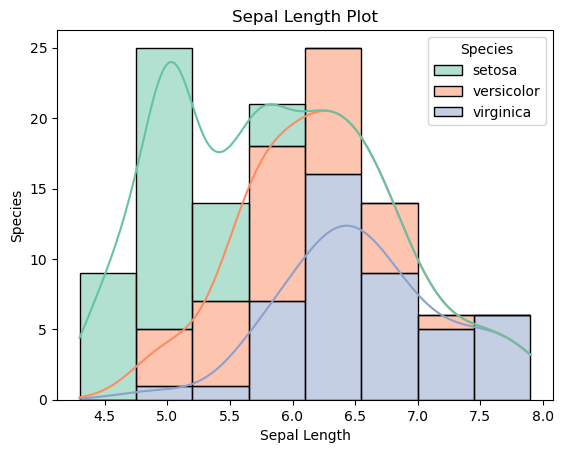

In [21]:
sns.histplot(
    data = train_df,
    x = 'Sepal.Length',
    hue = 'Species',
    multiple = 'stack', 
    palette = 'Set2', 
    kde = True)
plt.title("Sepal Length Plot")
plt.xlabel("Sepal Length")
plt.ylabel("Species")
plt.show()

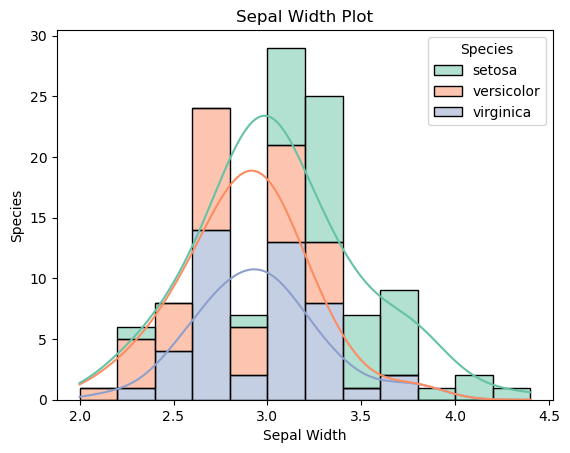

In [22]:
sns.histplot(
    data = train_df,
    x = 'Sepal.Width',
    hue = 'Species',
    multiple = 'stack', 
    palette = 'Set2', 
    kde = True)
plt.title("Sepal Width Plot")
plt.xlabel("Sepal Width")
plt.ylabel("Species")
plt.show()

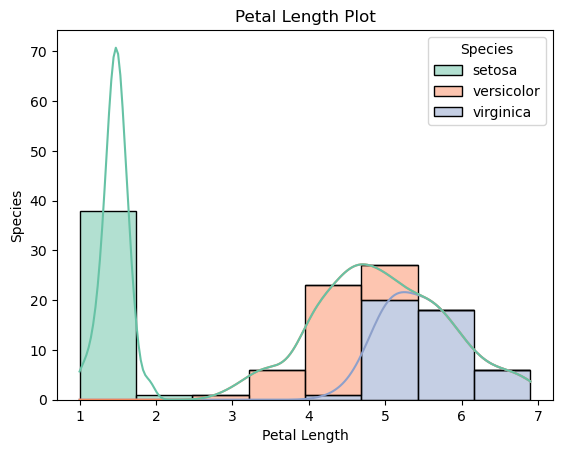

In [23]:
sns.histplot(
    data = train_df,
    x = 'Petal.Length',
    hue = 'Species',
    multiple = 'stack', 
    palette = 'Set2', 
    kde = True)
plt.title("Petal Length Plot")
plt.xlabel("Petal Length")
plt.ylabel("Species")
plt.show()

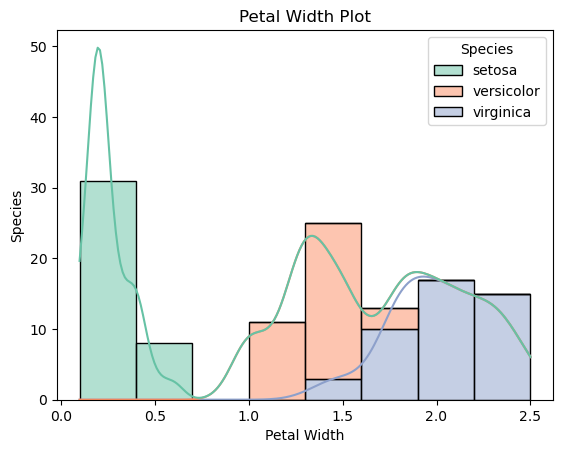

In [24]:
sns.histplot(
    data = train_df,
    x = 'Petal.Width',
    hue = 'Species',
    multiple = 'stack', 
    palette = 'Set2', 
    kde = True)
plt.title("Petal Width Plot")
plt.xlabel("Petal Width")
plt.ylabel("Species")
plt.show()

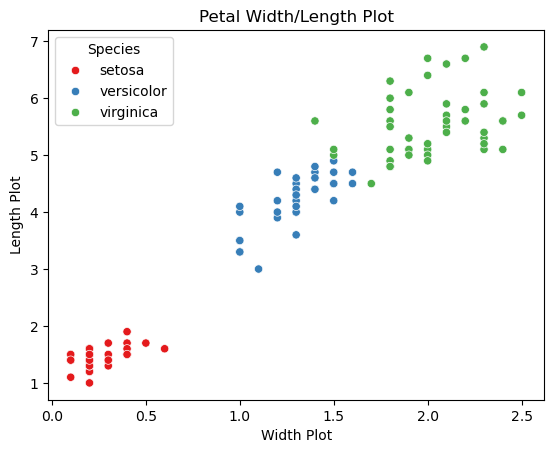

In [25]:
sns.scatterplot(data = train_df,
                x = 'Petal.Width',
                y = 'Petal.Length',
                hue = 'Species', 
                palette = "Set1")
plt.title("Petal Width/Length Plot")
plt.xlabel("Width Plot")
plt.ylabel("Length Plot")
plt.show()

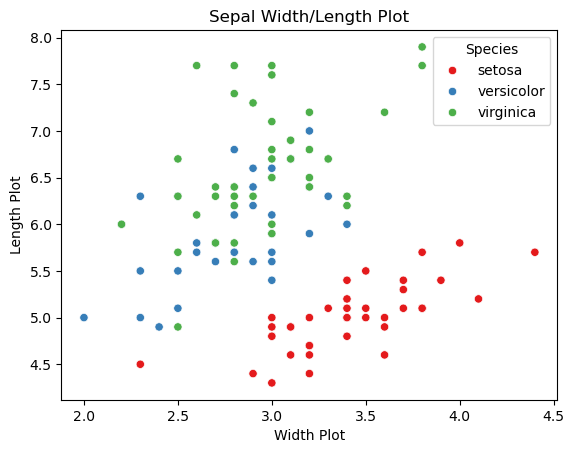

In [26]:
sns.scatterplot(data = train_df,
                x = 'Sepal.Width',
                y = 'Sepal.Length',
                hue = 'Species', 
                palette = "Set1"
               )
plt.title("Sepal Width/Length Plot")
plt.xlabel("Width Plot")
plt.ylabel("Length Plot")
plt.show()

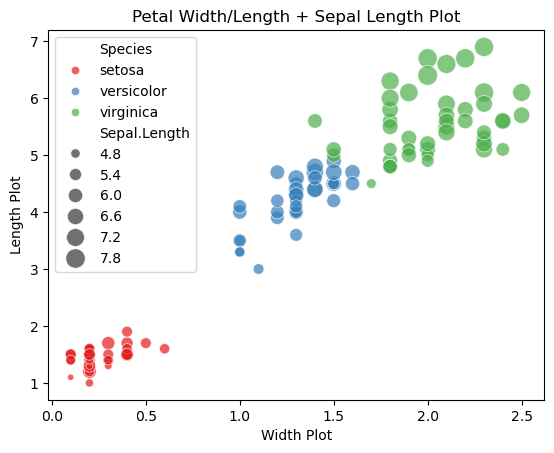

In [27]:
#Combined 3 variable scatterplot using size
sns.scatterplot(data = train_df,
                x = 'Petal.Width',
                y = 'Petal.Length',
                hue = 'Species', 
                palette = "Set1",
                size = "Sepal.Length", 
                sizes = (20, 200),
                alpha = .7
               )
plt.title("Petal Width/Length + Sepal Length Plot")
plt.xlabel("Width Plot")
plt.ylabel("Length Plot")
plt.show()


#### **WRITE YOUR HYPOTHESES HERE**

My Hypothesis is that Petal Width and Length will easily be the most valuable here. Sepal Length and Width could provide some value, but I fear that it could also skew the data in some ways. I plan to try models with all 4 features, and then varied mixes of the two. I think that messing with the c-val, l1-ratio, and tolerence could make some better results. 

## Part 5: Model selection

Based on your generaeted hypotheses, select at least three models to try out. For each of these models, compute:
1. The average precision, recall and accuracy across all folds.
2. The minimum precision, recall and accuracy across all folds.
3. The maximum precision, recall and accuracy across all folds.

Print these in a way that is concise and clear. It might be helpful for you to write a function that generates this summary directly from the output of `kfold_crossval`

In [28]:
## WRITE CODE HERE (add as many code chunks as you need)
def summarize_stats(metrics):
    summaries = {}
    for col in metrics.columns[0:3]:
        min_val = metrics[col].min()
        max_val = metrics[col].max()
        avg_val = metrics[col].mean()
        print(f"For Column {col}:")
        print(f" Min is {min_val}, max is {max_val}, average is {avg_val}")
        summaries[col] = {"minimum": min_val, "maximum": max_val, "average": avg_val}
    return summaries

In [93]:
model1 = LogisticRegression()
x_cols = ["Petal.Width", "Petal.Length", "Sepal.Length"]
y_col = ["Species"]
metrics = kfold_crossval(train_df, model1, x_cols, y_col)
summary = summarize_stats(metrics)

For Column accuracy:
 Min is 91.67, max is 100.0, average is 98.5
For Column precision:
 Min is 94.44, max is 100.0, average is 98.888
For Column recall:
 Min is 88.89, max is 100.0, average is 98.47200000000001


Sometimes the best model is the simplest...

In [55]:
model2 = LogisticRegression(C = 50)
x_cols = ["Petal.Width", "Petal.Length"]
y_col = ["Species"]
metrics = kfold_crossval(train_df, model2, x_cols, y_col)
summary = summarize_stats(metrics)

For Column accuracy:
 Min is 91.67, max is 100.0, average is 97.78599999999999
For Column precision:
 Min is 93.33, max is 100.0, average is 98.221
For Column recall:
 Min is 88.89, max is 100.0, average is 97.916


In [31]:
model3 = LogisticRegression()
x_cols = ["Sepal.Width", "Sepal.Length"]
y_col = ["Species"]
metrics = kfold_crossval(train_df, model3, x_cols, y_col)
summary = summarize_stats(metrics)

For Column accuracy:
 Min is 60.0, max is 91.67, average is 77.08
For Column precision:
 Min is 66.67, max is 91.67, average is 80.45599999999999
For Column recall:
 Min is 68.89, max is 100.0, average is 83.65800000000002


In [32]:
model4 = LogisticRegression(max_iter = 1000)
x_cols = ["Sepal.Width", "Sepal.Length", "Petal.Width", "Petal.Length"]
y_col = ["Species"]
metrics = kfold_crossval(train_df, model4, x_cols, y_col)
summary = summarize_stats(metrics)

For Column accuracy:
 Min is 87.5, max is 100.0, average is 97.25
For Column precision:
 Min is 83.33, max is 100.0, average is 97.221
For Column recall:
 Min is 83.33, max is 100.0, average is 96.805


In [91]:
model5 = LogisticRegression(penalty = 'elasticnet', l1_ratio = .1, solver = 'saga', max_iter = 1000, tol = .04, C = 10)
x_cols = ["Sepal.Width", "Petal.Width", "Petal.Length"]
y_col = ["Species"]
metrics = kfold_crossval(train_df, model5, x_cols, y_col)
summary = summarize_stats(metrics)

For Column accuracy:
 Min is 83.33, max is 100.0, average is 97.083
For Column precision:
 Min is 83.33, max is 100.0, average is 97.00000000000001
For Column recall:
 Min is 83.33, max is 100.0, average is 97.22200000000001


## Part 6: Evaluate your final model

/Users/douglas/mambaforge/envs/ml/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


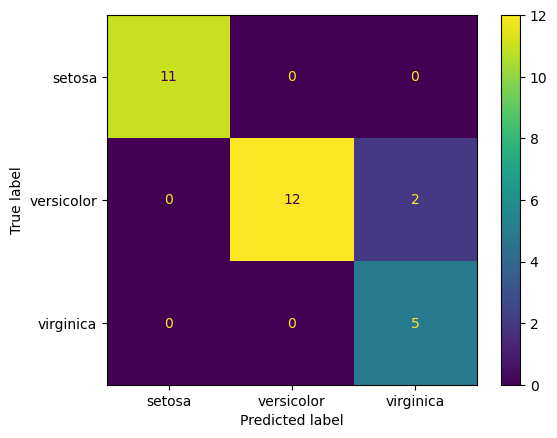

In [99]:
x_cols = ["Petal.Width", "Petal.Length", "Sepal.Length"]
y_test_pred = model1.predict(test_df[x_cols])
actual_labels = test_df["Species"].values.ravel()
cm = confusion_matrix(actual_labels, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model1.classes_)
disp.plot()
plt.show()

### Conclusion/ Reflection

1. Was the performance of the final model surprising? Why or why not? 
2. Would you want to change anything about the k-fold cross validation model selection process? 

#### **WRITE YOUR ANSWER HERE**

1) Well, I am glad it did pretty well. I wish it had done perfectly, but alas it isn't quite there. I am not suprised it had some difficulty between versicolor and virginica, as the model had some overlap in the differentiating features between the two. I am happy that it was perfectly able to differentiate setosa and versicolor though.
2) I guess if I were to change anything, it would be the number of folds. I imagine there is a perfect number of folds that matches the data to the best possible degree. I am not sure what that number would be, but you could probably do something similar to gradient descent but with the number of folds to find the optimal number. That would be cool.
   